In [2]:
import cv2
import numpy as np
import os

In [3]:
color_list = [(255,0,0),
             (255,255,0),
             (255,0,255),
             (255,255,255),
             (0,0,255),
             (0,255,0),
             (128,0,0),
             (128,128,0),
             (128,0,128),
             (128,128,128),
             (0,0,128),
             (0,128,0),
             (64,0,0),
             (64,64,0),
             (64,0,64),
             (64,64,64),
             (0,0,64),
             (0,64,0),
             (32,0,0),
             (32,32,0),
             (32,0,32),
             (32,32,32),
             (0,0,32),
             (0,32,0)
             ]

In [4]:
classes = np.array([
                         'u-turn', 'keep-right', 'keep-left', 'pass-either-side',
                         'compulsory-motor-cycles-track', 'stop', 'no-left-turn', 'no-right-turn', 'no-u-turn',
                         'no-entry', 'weight-limit-sign-5T', 'weight-limit-sign-30T', 'height-limit-sign-2.-m',
                         'height-limit-sign-3.-m', 'height-limit-sign-4.-m', 'height-limit-sign-5.-m', 'height-limit-sign-6.-m',
                         'speed-limit-20', 'speed-limit-30', 'speed-limit-40', 'speed-limit-50', 'speed-limit-60', 'speed-limit-70',
                         'speed-limit-80', 'speed-limit-90','speed-limit-110', 'no-entry-for-vehicles-ex-5T-truntks-etc',
                         'heavy-vehicles-no-driving-on-right-lane', 'no-parking', 'no-stopping', 'give-way', 'wide-limit-3.-m',
                         'no-overtaking', 'road-work', 'camera-operation-zone', 'crosswind-area', 'caution-hump',
                         'hump-ahead', 'towing-zone', 'left-bend', 'slippery-road', 'pedestrain-crossing-opt1', 'pedestrain-crossing-opt2',
                         'school-childern-crossing-opt1', 'school-childern-crossing-opt2', 'caution', 'narrow-roads-on-the-left',
                         'traffic-lights-ahead', 'obstacles', 'staggered-junctions', 'crossroads-T-junction', 'crossroads-to-the-right',
                         'crossroads-to-the-left', 'exit-to-the-left', 'crossroads', 'minor-road-on-right', 'minor-road-on-left',
                         'minor-road-on-left-opt2', 'cattle-crossing', 'roundabout-ahead', 'narrow-bridge','split-way', 'two-way-road',
                         'divided-road-ending', 'curve-on-the-left', 'crossroads-Y-junction'])

## 1) Calculate the freq of each class and store all the freq < 50 in keep varaibale array

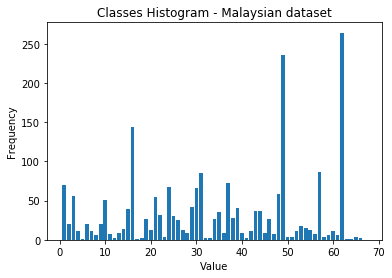

freq->
[ 70  20  56  11   1  20  11   6  20  51   7   2   9  14  39 144   1   2
  26  13  54  32   4  67  30  25  12   9  42  66  85   2   2  27  35   9
  72  28  41   9   2  11  37  37   9  27   8  59 235   3   3  11  18  15
  13   8  87   4   6  11   6 264   1   1   4   2]
Mean: 31.15
Var: 2207.25
Max: 264.00
Min: 1.00
Sum: 2056.00
STD: 46.98
CV: 1.51

Total number of objects: 2056


In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'data/MTSD/Annotations/gt.txt'


file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
# print counts
keep = np.where(frq < 50)
# print keep
# print classes[keep]
# print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
# print frq.mean(), frq.var(), frq.max(), frq.min(), frq.sum(), frq.std()
# print len(tmp)


print 'freq->\n',counts
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print 'Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean())
print 'Total number of objects:',len(tmp)

## 2) Loop for each image
### - blur the objects that is not in keep array
### - store only the images that have at least one object in keep array in aug folder
### - store aswell the labels for each image obj in aug folder in aug_labels

In [12]:
im_path = './data/MTSD/Images/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]
#mask_path = './data/test/gt/'
label_path = './data/test/labels/'

#fname = 'P1840185.JPG'
#fname = 'P1840114.JPG'
#fname = 'P1840116.JPG'
#fname = 'P1860061.JPG'

#keep = [0,2,3,4,5,6,8,9,10,11]

for fname in files:
    if fname.split('.')[1] == 'txt':
        continue
    #print fname
    if not os.path.isfile(os.path.join(label_path, fname.split('.')[0]+'.txt')):
        #fault = open('faults.txt', 'a')
        #fault.write(fil+'\n')
        continue
    
    store = False

    im = cv2.imread(os.path.join(im_path, fname))
    org = im.copy()
    f = open(os.path.join(label_path, fname.split('.')[0]+'.txt'), 'r')
    
    lines = f.readlines()
    text = ''
    for line in lines:
        spl = line.split(' ')
        i = np.where(classes == spl[0])[0][0]
        if i not in keep[0]:
            x1 = int(spl[1])#+1
            y1 = int(spl[2])#+1
            x2 = int(spl[3])#-1
            y2 = int(spl[4])#-1

            #print y2-y1, x2-x1

            #cv2.imwrite('without_aug.jpg', im)
            #print im[y1:y2,x1:x2]

            np.random.shuffle(im[y1:y2+1,x1:x2+1,0])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,0].T)

            np.random.shuffle(im[y1:y2+1,x1:x2+1,1])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,1].T)

            np.random.shuffle(im[y1:y2+1,x1:x2+1,2])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,2].T)

            #np.random.shuffle(im[y1:y2,x1:x2])
            #np.random.shuffle(im[y1:y2,x1:x2].T)

            blur = cv2.blur(im, (50, 50))

            #print lines[0] , x1, x2, y1, y2

            #print im[y1:y2,x1:x2,0]
            #cv2.imwrite('aug.jpg', im)

            num =10
            im[y1-num:y2+num,x1-num:x2+num] = blur[y1-num:y2+num,x1-num:x2+num]
            #cv2.imwrite('aug_blur.jpg', im)

    for line in lines:
        spl = line.split(' ')
        i = np.where(classes == spl[0])[0][0]
        if i in keep[0]:
            store = True
            
            #spl = line.split(' ')
            x1 = int(spl[1])#+1
            y1 = int(spl[2])#+1
            x2 = int(spl[3])#-1
            y2 = int(spl[4])#-1
            text += line
            #im2 = cv2.imread(os.path.join(im_path, fname))
            ynum = int(y2-y1)/14
            xnum = int(x2-x1)/14
            im[y1-ynum:y2+ynum,x1-xnum:x2+xnum] = org[y1-ynum:y2+ynum,x1-xnum:x2+xnum]
    
    if store:
        cv2.imwrite(os.path.join('data/test/aug/',fname.split('.')[0]+'_aug'+'.jpg'), im)
        f_out = open(os.path.join('./data/test/aug_labels/', fname.split('.')[0]+'_aug'+'.txt'), 'w')
        f_out.write(text)
        f_out.close()

P1840029.JPG
DSC-0124.JPG
P1840143.JPG
P1840048.JPG
DSC-0334.JPG
P1860081.JPG
P1840357.JPG
DSC-0138.JPG
P1830952.JPG
106.jpg
DSC-0137.JPG
P1840292.JPG
P1830932.JPG
P1840231.JPG
P1840606.JPG
P1860280.JPG
P1840293.JPG
P1840389.JPG
P1840282.JPG
P1860363.JPG
118.jpg
P1840349.JPG
147.jpg
P1840103.JPG
P1840477.JPG
P1860637.JPG
P1840023.JPG
P1840602.JPG
P1840305.JPG
P1840170.JPG
111.jpg
P1840113.JPG
P1840173.JPG
P1840590.JPG
P1840578.JPG
P1840368.JPG
P1840378.JPG
P1840097.JPG
P1840272.JPG
P1840525.JPG
P1830924.JPG
P1840460.JPG
P1840377.JPG
P1840243.JPG
P1830989.JPG
P1860060.JPG
142.jpg
P1840527.JPG
P1840011.JPG
P1860059.JPG
P1840199.JPG
P1830986.JPG
P1840369.JPG
P1860415.JPG
P1840261.JPG
P1840140.JPG
P1840552.JPG
P1860354.JPG
P1840556.JPG
P1830937.JPG
P1830930.JPG
DSC-0148.JPG
P1840359.JPG
P1840355.JPG
P1840576.JPG
P1840312.JPG
P1840093.JPG
P1840162.JPG
P1840350.JPG
P1840129.JPG
DSC-0120.JPG
P1860416.JPG
P1840212.JPG
DSC-0135.JPG
P1860073.JPG
P1840193.JPG
129.jpg
P1840208.JPG
46.jpg
88.jpg
P1

P1830971.JPG
P1860340.JPG
DSC-0333.JPG
P1840570.JPG
28.jpg
P1840260.JPG
P1840454.JPG
P1840065.JPG
P1840135.JPG
DSC-0328.JPG
P1840155.JPG
P1840449.JPG
P1840003.JPG
P1840358.JPG
P1830962.JPG
P1840558.JPG
52.jpg
P1860054.JPG
P1840324.JPG
P1830990.JPG
P1840374.JPG
117.jpg
P1840526.JPG
P1840287.JPG
128.jpg
P1830968.JPG
DSC-0101.JPG
DSC-0126.JPG
44.jpg
P1840271.JPG
P1840086.JPG
P1840285.JPG
P1840280.JPG
P1840546.JPG
P1860355.JPG
P1840532.JPG
P1840414.JPG
P1840482.JPG
P1840284.JPG
P1840064.JPG
P1860348.JPG
P1860065.JPG
P1840362.JPG
104.jpg
P1840122.JPG
P1840485.JPG
P1840365.JPG
35.jpg
P1840252.JPG
P1830973.JPG
116.jpg
P1830983.JPG
P1830979.JPG
P1860087.JPG
P1860096.JPG
8.jpg
P1840176.JPG
110.jpg
P1840234.JPG
P1840364.JPG
P1830947.JPG
P1860642.JPG
DSC-0123.JPG
P1840175.JPG
P1830941.JPG
P1840575.JPG
P1840051.JPG
P1860360.JPG
P1840478.JPG
P1840061.JPG
DSC-0119.JPG
P1840453.JPG
P1830960.JPG
P1840543.JPG
81.jpg
P1860083.JPG
P1860631.JPG
P1840030.JPG
P1860365.JPG
P1840239.JPG
92.jpg
P1840313.JPG
P1

## 3) Generate the mask image for each aug image

In [13]:
im_path = './data/test/aug/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]

In [14]:
mask_path = './data/test/aug_gt/'
label_path = './data/test/aug_labels/'

for fil in files:
    if not os.path.isfile(os.path.join(label_path, fil.split('.')[0]+'.txt')):
        #fault = open('faults.txt', 'a')
        #fault.write(fil+'\n')
        continue
    im = cv2.imread(os.path.join(im_path, fil))
    f = open(os.path.join(label_path, fil.split('.')[0]+'.txt'))
    #print os.path.join(label_path, fil.split('.')[0]+'.txt')
    lines = f.readlines()
    im_out = np.zeros(im.shape, np.uint8)
    for i, line in enumerate(lines):
        spl = line.split(' ')
        x1 = int(spl[1])#+1
        y1 = int(spl[2])#+1
        x2 = int(spl[3])#-1
        y2 = int(spl[4])#-1
        #print fil, i, line
        cv2.rectangle(im_out, (x1,y1), (x2,y2),color_list[i], -1)
    #print '______'
    cv2.imwrite(os.path.join(mask_path, fil), im_out)

## 4) Augment the images with ground truth mask

In [15]:
import Augmentor

In [16]:
p = Augmentor.Pipeline("./data/test/aug")
p.ground_truth("./data/test/aug_gt")

Initialised with 523 image(s) found.
Output directory set to ./data/test/aug/output.523 ground truth image(s) found.


In [17]:
p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.2)
p.random_distortion(probability=0.7, grid_width=4, grid_height=4, magnitude=8)
p.skew_tilt(probability=0.5, magnitude=0.3)
p.skew(probability=0.5, magnitude=0.3)

In [18]:
#p.remove_operation(operation_index=0)

p.status()

Operations: 5
	0: RotateRange (max_right_rotation=10.0 max_left_rotation=-10.0 probability=0.5 )
	1: Zoom (min_factor=1.1 max_factor=1.2 probability=0.5 )
	2: Distort (randomise_magnitude=True magnitude=8 grid_height=4 probability=0.7 grid_width=4 )
	3: Skew (magnitude=0.3 skew_type=TILT probability=0.5 )
	4: Skew (magnitude=0.3 skew_type=RANDOM probability=0.5 )
Images: 523
Classes: 1
	Class index: 0 Class label: aug 
Dimensions: 20
	Width: 1917 Height: 981
	Width: 1917 Height: 977
	Width: 1919 Height: 981
	Width: 1920 Height: 981
	Width: 1917 Height: 979
	Width: 1920 Height: 985
	Width: 1919 Height: 979
	Width: 1920 Height: 979
	Width: 1915 Height: 981
	Width: 1918 Height: 983
	Width: 3840 Height: 2160
	Width: 1919 Height: 977
	Width: 1920 Height: 977
	Width: 1917 Height: 983
	Width: 1919 Height: 983
	Width: 3920 Height: 2208
	Width: 1915 Height: 975
	Width: 4592 Height: 3448
	Width: 1917 Height: 975
	Width: 1920 Height: 983
Formats: 1
	 JPEG

You can remove operations using the appr

In [19]:
p.sample(395*10, multi_threaded=True)

Processing <PIL.Image.Image image mode=RGB size=4592x3448 at 0x7FC74064F850>: 100%|██████████| 3950/3950 [49:51<00:00,  1.32 Samples/s]                    


## 5) Create the annotation for the new augmented images

In [20]:
aug_path = './data/test/aug/output/'
files = [f for f in os.listdir(aug_path) if os.path.isfile(os.path.join(aug_path,f))]

gts = []
augs = []

for fi in files:
    if 'original' in fi:
        augs.append(fi)
    else:
        gts.append(fi)

In [450]:
print gts[0].split('_')[6] in augs[0].split('_')[4]
print gts[0]
print augs[0]
x = 'aug_original_49_aug.jpg_45daa9b6-92a4-4fc2-893e-f08ac42f23d1.jpg'
y = x.replace('aug_original_', '_groundtruth_(1)_aug_')
print y, os.path.isfile(os.path.join(aug_path, y))
print len(augs), len(gts)

print label_path, mask_path

False
_groundtruth_(1)_aug_68_aug.jpg_382b7478-7e90-4361-8468-ea119b5dbc5f.jpg
aug_original_P1860055_aug.jpg_03763ed1-9aba-4813-8e0a-182955d61ce1.jpg
_groundtruth_(1)_aug_49_aug.jpg_45daa9b6-92a4-4fc2-893e-f08ac42f23d1.jpg False
8350 8350
./data/test/aug_labels/ ./data/test/aug_gt/


In [31]:
# mask with different colors space per each object sequential

#./data/test/gt/P1840014.JPG
#./data/test/gt/P1840114.JPG
# P1860079.JPG

#ff = '130.jpg'
mask_gt_path = './data/test/aug/output/'
label_path = './data/test/aug_labels/'

f_out = open('results/gt_phase_1.txt', 'w')
for aug in augs:
    aug_sp = aug.split('_')
    gt = aug.replace('aug_original_', '_groundtruth_(1)_aug_')
    org_file =  aug_sp[2]+'_'+aug_sp[3]
    
    
    if not os.path.exists(os.path.join(label_path, org_file.split('.')[0]+'.txt')):
        continue
        
    im = cv2.imread(os.path.join(mask_gt_path,gt))
    f = open(os.path.join(label_path, org_file.split('.')[0]+'.txt'), 'r')
    
    #im[im == 255] = 1
    #im[im == 0] = 255
    #im[im == 1] = 0
    lines = f.readlines()
    #print 'Number of objects', len(lines)
    for i in range(0, len(lines)):
        lower = np.array(color_list[i])-10
        upper = np.array(color_list[i])+10
        mask = cv2.inRange(im, lower, upper)
        im3 = cv2.bitwise_and(im, im, mask=mask)


        #print 'obj#', i
        im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

        #print np.max(im2), np.min(im2)

        #cv2.imwrite(org_file+str(i)+'_thr.jpg', im2)
        ret, thresh = cv2.threshold(im2, 0, np.max(im2)+1 ,cv2.THRESH_BINARY)
        _, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #print len(contours), org_file
        if len(contours) == 0:
            continue
        #for i in range(0, len(contours)):
            #if(i%2 == 0)

        # getting the maximum width contours
        x,y,w,h = cv2.boundingRect(contours[0])
        for cnt in contours:
            cx, cy, cw, ch = cv2.boundingRect(cnt)
            if cw > w:
                x,y,w,h = cx, cy, cw, ch
        #cnt = contours[i]
        # Fix problem of corner small bbox
        #print im.shape, x,y,w+x,h+y, aug
        if x == 0 or y == 0 or ((x+w) == im.shape[1]) or ((y+h) == im.shape[0]):
            nw = float(w)/im.shape[1]
            nh = float(h)/im.shape[0]
            ratio = float(max(nw,nh)) / min(nw,nh)
            if ratio >= 2.5:
                print 'skip->',ratio,nw, nh, aug, x, y, w, h, 'cls',cls_num
                continue
        #cv2.rectangle(im, (x,y), (x+w, y+h), (0,240,180), 5)
        cls_num = np.where(classes == lines[i].split(' ')[0])[0][0]
        f_out.write('./output/'+aug+';'+str(x)+';'+str(y)+';'+str(x+w)+';'+str(y+h)+';'+ str(cls_num) +'\n')
        #print (x,y), (x+w, y+h)
        #cv2.imwrite(org_file+str(i)+'.jpg', im)

        #print '_______'
f_out.close()

skip-> 3.27165256346 0.0265679442509 0.00812064965197 aug_original_P1860338_aug.jpg_5e33f5f7-33dd-4a16-ba07-9cf554317438.jpg 352 0 122 0 cls 38
skip-> 3.6228019785 0.0677264808362 0.24535962877 aug_original_P1840470_aug.jpg_eb5e754a-83d6-4afe-97a6-dcc42ca1fe74.jpg 4281 671 311 671 cls 6
skip-> 4.34911542923 0.01393728223 0.0606148491879 aug_original_P1860338_aug.jpg_aa89222a-f1d1-4401-a177-2b762f15584c.jpg 0 0 64 0 cls 42
skip-> 17.3534649632 0.0452961672474 0.00261020881671 aug_original_P1840002_aug.jpg_b90d0822-eead-4cd7-92dd-deeddde638af.jpg 0 1621 208 1621 cls 21
skip-> 3.07394917175 0.037456445993 0.115139211137 aug_original_P1840252_aug.jpg_5cd80828-bfc7-41b5-b7ba-67de63527cc5.jpg 0 1565 172 1565 cls 3
skip-> 2.69335744943 0.0681620209059 0.183584686775 aug_original_P1840214_aug.jpg_4e26150c-635d-49ca-b5d6-55f944ca09d0.jpg 0 823 313 823 cls 18
skip-> 7.9218337467 0.0378919860627 0.300174013921 aug_original_P1860045_aug.jpg_43035b00-0b64-4626-a311-46ea8e632e9f.jpg 0 17 174 17 cls 

skip-> 15.3155452436 0.00871080139373 0.133410672854 aug_original_P1860338_aug.jpg_9e18afcf-9b6e-46b4-8de4-73ce2efd8b66.jpg 0 222 40 222 cls 42
skip-> 12.6439493473 0.018074912892 0.228538283063 aug_original_P1860052_aug.jpg_91b9e37a-e7f6-4788-a029-a122dfd8ada3.jpg 0 111 83 111 cls 58
skip-> 18.0699219574 0.0191637630662 0.346287703016 aug_original_P1860039_aug.jpg_a74aa32f-6450-41b2-be3c-b64f77b8f19a.jpg 0 350 88 350 cls 21
skip-> 9.82192575406 0.00348432055749 0.034222737819 aug_original_P1840140_aug.jpg_1c1776ef-b390-4721-8bed-82827f103278.jpg 0 2024 16 2024 cls 51
skip-> 30.7857142857 0.0357142857143 0.00116009280742 aug_original_P1840037_aug.jpg_41db8c92-3f1d-4e56-9810-836312f84420.jpg 0 1121 164 1121 cls 42
skip-> 3.76705336427 0.030487804878 0.114849187935 aug_original_P1840181_aug.jpg_f1b50cdc-0ed6-456f-ac66-e70d3d911029.jpg 0 1243 140 1243 cls 45
skip-> 6.37643253885 0.0143728222997 0.0916473317865 aug_original_P1860045_aug.jpg_5222103d-eeef-4535-ab5a-4cd3510dfba0.jpg 0 944 66

skip-> 6.32598607889 0.0182926829268 0.115719257541 aug_original_P1840513_aug.jpg_ba02d64f-5809-41f9-a0a5-b42154abe7eb.jpg 4508 1308 84 1308 cls 45
skip-> 5.11686408597 0.0496515679443 0.254060324826 aug_original_P1840602_aug.jpg_c2b70074-bd15-4357-9d41-991690a090d5.jpg 0 114 228 114 cls 18
skip-> 2.54991952967 0.0995209059233 0.253770301624 aug_original_P1830995_aug.jpg_18e4a60c-2480-403b-8dbc-e9b8be23dab5.jpg 0 546 457 546 cls 42
skip-> 4.70185614849 0.0357142857143 0.167923433875 aug_original_P1860052_aug.jpg_113ebb75-7eaf-4f9b-b6d0-e33b52f89fb0.jpg 0 1166 164 1166 cls 18
skip-> 5.99303944316 0.00217770034843 0.0130510440835 aug_original_P1840004_aug.jpg_2b7f8873-d5bd-496c-aab4-7a35a1941c1e.jpg 0 919 10 919 cls 18
skip-> 3.51258700696 0.0174216027875 0.0611948955916 aug_original_P1840123_aug.jpg_7e57c5bb-36fa-4db8-ae03-3119e54e50e8.jpg 0 1285 80 1285 cls 52
skip-> 4.3283062645 0.00348432055749 0.0150812064965 aug_original_P1830986_aug.jpg_cb52ebef-16e8-42e3-8cd3-77810abf9da2.jpg 0 7

## End Phase 1

## Check histogram

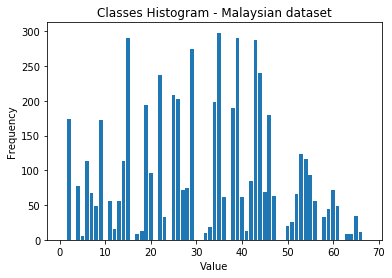

freq->
[174  77   6 113  67  49 173  56  15  56 113 290   9  12 194  96 237  33
 208 203  71  74 274  10  19 198 298  61 190 290  62  12  84 288 240  69
 179  63  20  26  66 124 116  93  56  33  44  71  48   8   8  34  11]
Mean: 102.28
Var: 7767.79
Max: 298.00
Min: 6.00
Sum: 5421.00
STD: 88.14
CV: 0.86

Total number of objects: 5421


In [32]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results/gt_phase_1.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print 'freq->\n',counts
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print 'Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean())
print 'Total number of objects:',len(tmp)

In [33]:
!cat gt.txt > ./results/gt_phase_1_after_aug.txt
!cat ./results/gt_phase_1.txt >> ./results/gt_phase_1_after_aug.txt

## Phase 2

## 1) Calculate the freq of each class and store all the freq < 50 in keep varaibale array

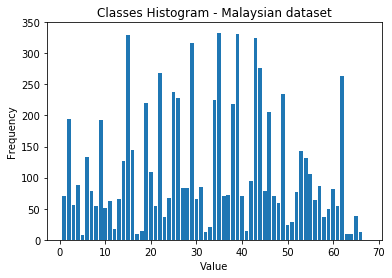

freq->
[ 70 194  56  88   7 133  78  55 193  51  63  17  65 127 329 144  10  14
 220 109  54 269  37  67 238 228  83  83 316  66  85  12  21 225 333  70
  72 218 331  71  14  95 325 277  78 206  71  59 235  23  29  77 142 131
 106  64  87  37  50  82  54 264   9   9  38  13]
Mean: 113.29
Var: 8982.72
Max: 333.00
Min: 7.00
Sum: 7477.00
STD: 94.78
CV: 0.84

Total number of objects: 7477


In [36]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results/gt_phase_1_after_aug.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print 'freq->\n',counts
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print 'Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean())
print 'Total number of objects:',len(tmp)

In [37]:
keep = np.where(frq < 50)
print keep

(array([ 4, 11, 16, 17, 22, 31, 32, 40, 49, 50, 57, 62, 63, 64, 65]),)


## 2) Loop for each image
### - blur the objects that is not in keep array
### - store only the images that have at least one object in keep array in aug folder
### - store aswell the labels for each image obj in aug folder in aug_labels

In [39]:
im_path = './data/MTSD/Images/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]
#mask_path = './data/test/gt/'
label_path = './data/test/labels/'

#fname = 'P1840185.JPG'
#fname = 'P1840114.JPG'
#fname = 'P1840116.JPG'
#fname = 'P1860061.JPG'

#keep = [0,2,3,4,5,6,8,9,10,11]
for fname in files:
    if fname.split('.')[1] == 'txt':
        continue
        
    if not os.path.isfile(os.path.join(label_path, fname.split('.')[0]+'.txt')):
        #fault = open('faults.txt', 'a')
        #fault.write(fil+'\n')
        continue
    
    store = False

    im = cv2.imread(os.path.join(im_path, fname))
    org = im.copy()
    f = open(os.path.join(label_path, fname.split('.')[0]+'.txt'), 'r')
    
    lines = f.readlines()
    text = ''
    for line in lines:
        spl = line.split(' ')
        i = np.where(classes == spl[0])[0][0]
        if i not in keep[0]:
            x1 = int(spl[1])#+1
            y1 = int(spl[2])#+1
            x2 = int(spl[3])#-1
            y2 = int(spl[4])#-1

            #print y2-y1, x2-x1

            #cv2.imwrite('without_aug.jpg', im)
            #print im[y1:y2,x1:x2]

            np.random.shuffle(im[y1:y2+1,x1:x2+1,0])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,0].T)

            np.random.shuffle(im[y1:y2+1,x1:x2+1,1])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,1].T)

            np.random.shuffle(im[y1:y2+1,x1:x2+1,2])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,2].T)

            #np.random.shuffle(im[y1:y2,x1:x2])
            #np.random.shuffle(im[y1:y2,x1:x2].T)

            blur = cv2.blur(im, (50, 50))

            #print lines[0] , x1, x2, y1, y2

            #print im[y1:y2,x1:x2,0]
            #cv2.imwrite('aug.jpg', im)

            num =10
            im[y1-num:y2+num,x1-num:x2+num] = blur[y1-num:y2+num,x1-num:x2+num]
            #cv2.imwrite('aug_blur.jpg', im)

    for line in lines:
        spl = line.split(' ')
        i = np.where(classes == spl[0])[0][0]
        if i in keep[0]:
            store = True
            
            #spl = line.split(' ')
            x1 = int(spl[1])#+1
            y1 = int(spl[2])#+1
            x2 = int(spl[3])#-1
            y2 = int(spl[4])#-1
            text += line
            #im2 = cv2.imread(os.path.join(im_path, fname))
            ynum = int(y2-y1)/14
            xnum = int(x2-x1)/14
            im[y1-ynum:y2+ynum,x1-xnum:x2+xnum] = org[y1-ynum:y2+ynum,x1-xnum:x2+xnum]
    
    if store:
        cv2.imwrite(os.path.join('data/test/aug2/',fname.split('.')[0]+'_aug'+'.jpg'), im)
        f_out = open(os.path.join('./data/test/aug2_labels/', fname.split('.')[0]+'_aug'+'.txt'), 'w')
        f_out.write(text)
        f_out.close()

## 3) Generate the mask image for each aug image

In [40]:
im_path = './data/test/aug2/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]

In [41]:
mask_path = './data/test/aug2_gt/'
label_path = './data/test/aug2_labels/'

for fil in files:
    if not os.path.isfile(os.path.join(label_path, fil.split('.')[0]+'.txt')):
        #fault = open('faults.txt', 'a')
        #fault.write(fil+'\n')
        continue
    im = cv2.imread(os.path.join(im_path, fil))
    f = open(os.path.join(label_path, fil.split('.')[0]+'.txt'))
    #print os.path.join(label_path, fil.split('.')[0]+'.txt')
    lines = f.readlines()
    im_out = np.zeros(im.shape, np.uint8)
    for i, line in enumerate(lines):
        spl = line.split(' ')
        x1 = int(spl[1])#+1
        y1 = int(spl[2])#+1
        x2 = int(spl[3])#-1
        y2 = int(spl[4])#-1
        #print fil, i, line
        cv2.rectangle(im_out, (x1,y1), (x2,y2),color_list[i], -1)
    #print '______'
    cv2.imwrite(os.path.join(mask_path, fil), im_out)

## 4) Augment the images with ground truth mask

In [42]:
import Augmentor

p = Augmentor.Pipeline("./data/test/aug2")
p.ground_truth("./data/test/aug2_gt")

p.rotate(probability=0.4, max_left_rotation=5, max_right_rotation=5)
p.zoom(probability=0.3, min_factor=1.05, max_factor=1.1)
p.random_distortion(probability=0.7, grid_width=2, grid_height=2, magnitude=5)
p.skew_tilt(probability=0.5, magnitude=0.2)
p.skew(probability=0.5, magnitude=0.2)

p.sample(44*100, multi_threaded=True)

Executing Pipeline:   0%|          | 0/4400 [00:00<?, ? Samples/s]

Initialised with 33 image(s) found.
Output directory set to ./data/test/aug2/output.33 ground truth image(s) found.


Processing <PIL.Image.Image image mode=RGB size=4592x3448 at 0x7FC76C05ACD0>: 100%|██████████| 4400/4400 [58:58<00:00,  1.24 Samples/s]                    


In [43]:
aug_path = './data/test/aug2/output/'
files = [f for f in os.listdir(aug_path) if os.path.isfile(os.path.join(aug_path,f))]

gts = []
augs = []

for fi in files:
    if 'original' in fi:
        augs.append(fi)
    else:
        gts.append(fi)

In [462]:
print gts[0].split('_')[6] in augs[0].split('_')[4]
print gts[0]
print augs[0]
x = 'aug_original_49_aug.jpg_45daa9b6-92a4-4fc2-893e-f08ac42f23d1.jpg'
y = x.replace('aug_original_', '_groundtruth_(1)_aug_')
print y, os.path.isfile(os.path.join(aug_path, y))
print len(augs), len(gts)

print label_path, mask_path

False
_groundtruth_(1)_aug_68_aug.jpg_382b7478-7e90-4361-8468-ea119b5dbc5f.jpg
aug_original_P1860055_aug.jpg_03763ed1-9aba-4813-8e0a-182955d61ce1.jpg
_groundtruth_(1)_aug_49_aug.jpg_45daa9b6-92a4-4fc2-893e-f08ac42f23d1.jpg False
8350 8350
./data/test/aug_labels/ ./data/test/aug_gt/


## 5) Create the annotation for the new augmented images

In [50]:
# mask with different colors space per each object sequential

#./data/test/gt/P1840014.JPG
#./data/test/gt/P1840114.JPG
# P1860079.JPG

#ff = '130.jpg'
mask_gt_path = './data/test/aug2/output/'
label_path = './data/test/aug2_labels/'

f_out = open('results/gt_phase_2.txt', 'w')
for aug in augs:
    aug_sp = aug.split('_')
    gt = aug.replace('aug2_original_', '_groundtruth_(1)_aug2_')
    org_file =  aug_sp[2]+'_'+aug_sp[3]
    
    
    if not os.path.exists(os.path.join(label_path, org_file.split('.')[0]+'.txt')):
        continue
        
    im = cv2.imread(os.path.join(mask_gt_path,gt))
    f = open(os.path.join(label_path, org_file.split('.')[0]+'.txt'), 'r')
    
    #im[im == 255] = 1
    #im[im == 0] = 255
    #im[im == 1] = 0
    lines = f.readlines()
    #print 'Number of objects', len(lines)
    for i in range(0, len(lines)):
        lower = np.array(color_list[i])-10
        upper = np.array(color_list[i])+10
        mask = cv2.inRange(im, lower, upper)
        im3 = cv2.bitwise_and(im, im, mask=mask)


        #print 'obj#', i
        im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

        #print np.max(im2), np.min(im2)

        #cv2.imwrite(org_file+str(i)+'_thr.jpg', im2)
        ret, thresh = cv2.threshold(im2, 0, np.max(im2)+1 ,cv2.THRESH_BINARY)
        _, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #print len(contours), org_file
        if len(contours) == 0:
            continue
        #for i in range(0, len(contours)):
            #if(i%2 == 0)

        # getting the maximum width contours
        x,y,w,h = cv2.boundingRect(contours[0])
        for cnt in contours:
            cx, cy, cw, ch = cv2.boundingRect(cnt)
            if cw > w:
                x,y,w,h = cx, cy, cw, ch
        #cnt = contours[i]
        if x == 0 or y == 0 or ((x+w) == im.shape[1]) or ((y+h) == im.shape[0]):
            nw = float(w)/im.shape[1]
            nh = float(h)/im.shape[0]
            ratio = float(max(nw,nh)) / min(nw,nh)
            if ratio >= 2.5:
                print 'skip->',ratio,nw, nh, aug, x, y, w, h, 'cls',cls_num
                continue
        #cv2.rectangle(im, (x,y), (x+w, y+h), (0,240,180), 5)
        cls_num = np.where(classes == lines[i].split(' ')[0])[0][0]
        f_out.write('./output/'+aug+';'+str(x)+';'+str(y)+';'+str(x+w)+';'+str(y+h)+';'+ str(cls_num) +'\n')
        #print (x,y), (x+w, y+h)
        #cv2.imwrite(org_file+str(i)+'.jpg', im)

        #print '_______'
f_out.close()

skip-> 4.57226854156 0.0742595818815 0.0162412993039 aug2_original_P1860113_aug.jpg_679eb4c8-29c6-4336-8d5e-a95d3434441b.jpg 2011 0 341 56 cls 64
skip-> 2.91693735499 0.0446428571429 0.130220417633 aug2_original_P1860056_aug.jpg_2aa9832c-e5d8-49e2-a7ad-94929cb12dc2.jpg 4387 1803 205 449 cls 16
skip-> 2.65064311941 0.0224303135889 0.0594547563805 aug2_original_P1860055_aug.jpg_3ab43964-2d0a-4c2f-883a-b001de91f962.jpg 0 1067 103 205 cls 40
skip-> 3.6232428006 0.0296167247387 0.107308584687 aug2_original_P1860056_aug.jpg_948647e5-277e-412e-bff4-23fa44c7d179.jpg 4456 1156 136 370 cls 57
skip-> 2.63475298656 0.0855836236934 0.0324825986079 aug2_original_P1860113_aug.jpg_70fdc252-d1bb-4a42-9b0f-7aee2d8e157a.jpg 2172 0 393 112 cls 31
skip-> 2.67557116281 0.0483449477352 0.129350348028 aug2_original_P1860056_aug.jpg_c09525e3-bfb1-4518-b9f3-4eeeb38a6e46.jpg 4370 1519 222 446 cls 50
skip-> 4.4531612529 0.0278745644599 0.124129930394 aug2_original_P1860056_aug.jpg_ec74d1fb-9f2c-4e11-ab2f-02d8d4f7

## Check histogram for phase 2 images

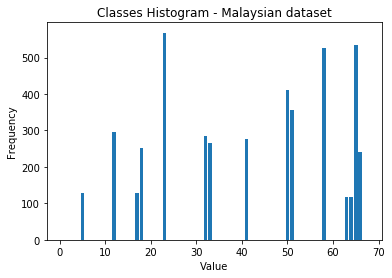

freq->
[127 297 129 252 568 286 265 277 411 357 525 117 117 534 240]
Mean: 300.13
Var: 21785.72
Max: 568.00
Min: 117.00
Sum: 4502.00
STD: 147.60
CV: 0.49

Total number of objects: 4502


In [51]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results/gt_phase_2.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print 'freq->\n',counts
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print 'Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean())
print 'Total number of objects:',len(tmp)

In [52]:
!cat gt.txt > ./results/gt_phase_2_after_aug.txt
!cat ./results/gt_phase_2.txt >> ./results/gt_phase_2_after_aug.txt

!cat ./results/gt_phase_1_after_aug.txt > ./results/gt_phase_1_2_after_aug.txt
!cat ./results/gt_phase_2.txt >> ./results/gt_phase_1_2_after_aug.txt

## Check histogram for phase 2 images merged with original images

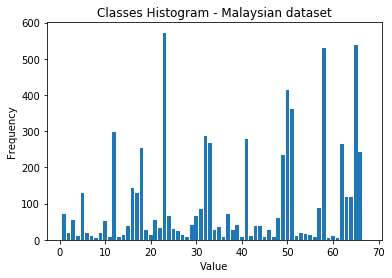

freq->
[ 70  20  56  11 128  20  11   6  20  51   7 299   9  14  39 144 130 254
  26  13  54  32 572  67  30  25  12   9  42  66  85 288 267  27  35   9
  72  28  41   9 279  11  37  37   9  27   8  59 235 414 360  11  18  15
  13   8  87 529   6  11   6 264 118 118 538 242]
Mean: 99.36
Var: 19108.44
Max: 572.00
Min: 6.00
Sum: 6558.00
STD: 138.23
CV: 1.39

Total number of objects: 6558


In [53]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results/gt_phase_2_after_aug.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print 'freq->\n',counts
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print 'Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean())
print 'Total number of objects:',len(tmp)

## Check histogram for phase 2 images merged with phase 1 and the original Image

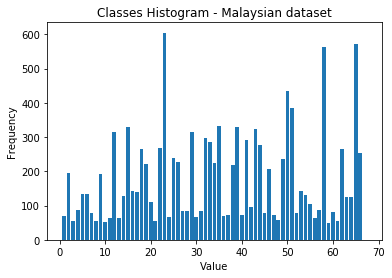

freq->
[ 70 194  56  88 134 133  78  55 193  51  63 314  65 127 329 144 139 266
 220 109  54 269 605  67 238 228  83  83 316  66  85 298 286 225 333  70
  72 218 331  71 291  95 325 277  78 206  71  59 235 434 386  77 142 131
 106  64  87 562  50  82  54 264 126 126 572 253]
Mean: 181.50
Var: 17613.67
Max: 605.00
Min: 50.00
Sum: 11979.00
STD: 132.72
CV: 0.73

Total number of objects: 11979


In [54]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results/gt_phase_1_2_after_aug.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print 'freq->\n',counts
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print 'Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean())
print 'Total number of objects:',len(tmp)

# Elimination
1- All images are in All_images withound the mask image

2- all the annotation are in gt_after_aug.txt

what i have to do:

1- Collect the total frequancy for each object

2- Generate for each image a dictienary to all objects in the image

3- from 1 & 2 check loop for each **class out of 66** image check if freq > 50 

    if True:
        loop for all images
            check if we delete the image no other object freq in the image will not be less 50:
                if yes -> delete the whole image and its annotation from the groundtruth then update the freq array
                if no -> then hide the objects that will not be affected then update the annotation as well as the freq array
                

In [126]:
def anno_parse(line):
    spl = line.split(';')
    name = spl[0]
    x1 = spl[1]
    y1 = spl[2]
    x2 = spl[3]
    y2 = spl[4]
    cls = spl[5].strip()
    
    return name, int(x1), int(y1), int(x2), int(y2), int(cls)

In [127]:
import numpy as np
import os
import cv2
import time
import progressbar

images_path = 'data/All_images'
gt_path = 'results/gt_after_aug.txt'

f = open(gt_path, 'rt')

# 1- Collect the total frequancy for each object
tmp = []
for line in f:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
    
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print frq, len(frq)

# 2- Generate for each image a dictienary to all objects in the image
my_dict = {}
f.seek(0)
lines = f.readlines()
#with progressbar.ProgressBar(maxval=len(lines)) as bar:
for i, line in enumerate(lines):
    name, x1,y1,x2,y2,cls = anno_parse(line)
    if not my_dict.has_key(name):
        my_dict.update({name:[]})

    my_obj = (x1,y1, x2, y2, cls)
    my_dict[name].append(my_obj)

        #bar.update(i)
print 'Done...'

# eliminate the objects with bbox aspect different very high or small
# and in corner
for img in my_dict:
    #print img[-20::], my_dict[img]
    for obj in my_dict[img]:
        x1,y1,x2,y2,_ = obj
        if x1 == 0:
            print img
    

f.close()

[ 70 194  56  88 134 133  78  55 193  51  63 314  65 127 329 144 139 266
 220 109  54 269 605  67 238 228  83  83 316  66  85 298 286 225 333  70
  72 218 331  71 291  95 325 277  78 206  71  59 235 434 386  77 142 131
 106  64  87 562  50  82  54 264 126 126 572 253] 66
Done...
aug_original_P1860042_aug.jpg_a6196d19-f2fb-402b-baeb-e5b1823236ac.jpg
aug_original_P1830995_aug.jpg_c2490d12-3ae9-4395-a084-86dc78832022.jpg
aug_original_P1830998_aug.jpg_34cc7cc5-3570-497f-a390-2df9df56834a.jpg
aug_original_P1860051_aug.jpg_a2c7dc9c-7272-4987-a6f0-ded401e81b39.jpg
aug_original_P1840261_aug.jpg_d615ac9f-d139-49aa-b6bc-b792c001cd0c.jpg
aug_original_P1840099_aug.jpg_d456da51-94fe-4e7d-b129-5ff6f6ddd339.jpg
aug_original_P1860338_aug.jpg_50644383-5ad3-4d20-8109-2e398f5824e4.jpg
aug_original_P1860042_aug.jpg_9a6d98aa-2bc0-4ca9-b793-81f2ef949c92.jpg
aug_original_P1840608_aug.jpg_aa7b81f3-8f2b-495b-9453-053fb44fa67d.jpg
aug_original_P1840028_aug.jpg_4967f7d1-ac15-4ab0-8130-1c09a4c76073.jpg
aug_origin

In [128]:
from PIL import Image

i = 0
for img in my_dict:
    for obj in my_dict[img]:
        im = Image.open(os.path.join(images_path,img))
        w,h = im.size
        x1,y1,x2,y2,cls = obj
        if x1 == 0 or x2 == w or y1 == 0 or y2 == h:
            i+=1
            print img, classes[cls], x1,y1,x2,y2
            
print i

aug_original_P1860042_aug.jpg_a6196d19-f2fb-402b-baeb-e5b1823236ac.jpg hump-ahead 0 1547 129 1677
aug_original_P1830995_aug.jpg_c2490d12-3ae9-4395-a084-86dc78832022.jpg school-childern-crossing-opt1 0 749 646 1708
aug2_original_P1860056_aug.jpg_28cfe989-0e1d-4ef6-b2ef-1bef847e7534.jpg weight-limit-sign-30T 4179 1338 4592 1904
aug_original_P1830998_aug.jpg_34cc7cc5-3570-497f-a390-2df9df56834a.jpg stop 0 429 308 633
aug_original_P1840065_aug.jpg_563191ed-e0f7-42ba-a3c1-99ee9dbb4d46.jpg speed-limit-90 4213 2051 4592 2402
aug2_original_P1860113_aug.jpg_8aead39b-15bf-4eb8-8d3e-5391d864538b.jpg speed-limit-20 2333 0 2664 304
aug_original_P1860051_aug.jpg_a2c7dc9c-7272-4987-a6f0-ded401e81b39.jpg towing-zone 0 1642 485 2058
aug_original_P1840261_aug.jpg_d615ac9f-d139-49aa-b6bc-b792c001cd0c.jpg speed-limit-60 0 0 568 654
aug_original_P1840099_aug.jpg_d456da51-94fe-4e7d-b129-5ff6f6ddd339.jpg camera-operation-zone 0 215 256 688
aug_original_P1840470_aug.jpg_8cedcb38-d66d-44c1-8b76-fb8ba171d5b6.jp

aug_original_P1840009_aug.jpg_0ecc3331-fedd-47dc-a540-99f14cf5301c.jpg towing-zone 0 934 256 1250
aug_original_P1840011_aug.jpg_c0b62e49-c91e-4a70-8425-ecec7d0c215c.jpg towing-zone 0 1671 338 1994
aug_original_P1860092_aug.jpg_750914c5-9715-4138-930d-83af3a8c692c.jpg no-entry-for-vehicles-ex-5T-truntks-etc 4224 336 4592 789
aug2_original_P1860113_aug.jpg_91bc7d64-e06d-4547-863c-8890548e9393.jpg speed-limit-20 1836 0 2331 319
aug_original_P1860056_aug.jpg_d3c789b9-1e15-4c96-a978-108a87e5a32b.jpg weight-limit-sign-30T 4197 1504 4592 1968
aug_original_P1840473_aug.jpg_fdbf2773-b02f-47aa-a3be-6a298ce5e261.jpg no-left-turn 4328 942 4592 1424
aug_original_P1840601_aug.jpg_742c23f9-9252-404b-8894-370b0b969436.jpg crossroads-to-the-left 0 708 877 1947
aug_original_P1840282_aug.jpg_54a89ee1-6641-4c33-b18d-8bf283e6bd01.jpg speed-limit-60 544 0 1117 271
aug2_original_P1860056_aug.jpg_3657587e-3104-40e6-8fbb-91f3124d08e6.jpg weight-limit-sign-30T 4234 1657 4592 2122
aug2_original_P1860113_aug.jpg_

aug_original_DSC-0333_aug.jpg_ddbd2c8e-d262-4064-bb35-06301354b45f.jpg speed-limit-110 3482 0 3837 373
aug2_original_P1860056_aug.jpg_2cca26da-ac3e-492f-810a-e87731dcc5ee.jpg weight-limit-sign-30T 4272 1645 4592 2044
aug_original_P1840222_aug.jpg_1a1f10cb-908b-4883-8e21-d58f39e59270.jpg crossroads-to-the-left 0 1801 245 2074
aug_original_P1840037_aug.jpg_af09805e-d031-4e39-842b-7821766ec250.jpg school-childern-crossing-opt1 0 0 500 756
aug2_original_P1860056_aug.jpg_8fdf3f7e-0f96-4878-9f67-2b150d24899d.jpg weight-limit-sign-30T 4240 1274 4592 1633
aug_original_P1840470_aug.jpg_c214168c-fea1-4963-9e89-e4be272412e8.jpg no-left-turn 4193 969 4592 1510
aug_original_P1840004_aug.jpg_f5f5312e-c3d3-4a5d-b796-90931f6015f9.jpg pedestrain-crossing-opt2 0 0 564 378
aug_original_P1840004_aug.jpg_9e0c2cbd-f048-4375-9c73-551beba4fe4e.jpg pedestrain-crossing-opt2 0 281 516 698
aug_original_P1840123_aug.jpg_c8fdb264-942f-458c-99e6-0c2124f0d2ed.jpg crossroads 0 1521 188 1796
aug_original_P1860411_aug.j

aug_original_P1830987_aug.jpg_c1562285-2b64-4c05-afba-19abea2a1afc.jpg crossroads-to-the-left 0 272 391 958
aug2_original_P1860113_aug.jpg_2d78667f-4aa4-4392-a394-ad1175e88647.jpg speed-limit-20 1237 0 1555 178
aug2_original_P1860113_aug.jpg_0e1fe093-66b2-441a-9dee-8a4589f92832.jpg speed-limit-20 1406 0 1738 279
aug2_original_P1860113_aug.jpg_385b2d5b-4cea-4d4a-97fa-8513a6d01c5d.jpg speed-limit-20 2283 0 2645 228
aug2_original_P1860056_aug.jpg_6a233b3a-bbc3-4b93-b4c3-5dc3eb6fa71f.jpg weight-limit-sign-30T 4312 1108 4592 1509
aug_original_P1840200_aug.jpg_0c542f96-82b5-4d81-81c2-17a49f194e6b.jpg crossroads 0 1499 252 1859
aug2_original_P1860113_aug.jpg_04ff573d-0c06-4797-accf-989f938b4c98.jpg speed-limit-20 1750 0 2153 352
aug2_original_P1860113_aug.jpg_53511154-4602-4001-8a8e-3932c3893f19.jpg speed-limit-20 1499 0 1837 327
aug2_original_P1840485_aug.jpg_35936b17-eb0c-4b07-8300-e06b91ce4855.jpg minor-road-on-left-opt2 0 1872 521 2281
aug_original_P1860068_aug.jpg_54ce4bda-a09a-4ecd-958f

3- from 1 & 2 check loop for each class out of 66 image check if freq > 50

if True:

    loop for all images
    
        check if we delete the image no other object freq in the image will not be less 50:
        
            if yes -> delete the whole image and its annotation from the groundtruth then update the freq array
            
            if no -> then hide the objects that will not be affected then update the annotation as well as the freq array


In [129]:
images_path = 'data/All_images'
del_image_path = 'del_image.txt'
del_object_path = 'del_object.txt'

del_image = open(del_image_path, 'wt')
del_object = open(del_object_path, 'wt')

imgs_del = [] # loop to delete all img from my_dict

for img in my_dict:
    im_del = True
    objs_del = []
    objs_not_del = []
    # check delete the image or not
    for i, obj in enumerate(my_dict[img]):
        _,_,_,_,cls = obj
        if frq[cls] <= 50:
            im_del = False
            objs_not_del.append(obj)
        else:
            frq[cls] -= 1 # correct here because we may have two objects from the same class and in case of im_del all
                            # of the object freq will be subtracted by 1 
            objs_del.append(obj)
            
    if im_del == True:
        #print img
        del_image.write(img+' '+str(objs_del)+'\n\r')
        os.remove(os.path.join(images_path, img))
        #del my_dict[img] #####->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>. del will affect the loop
        imgs_del.append(img) # TO NOT EFFECT THE LOOP I WILL DELETE THEM FROM my_dict AFTER THE LOOP
    else:
        #if len(objs_del) == 0: # comment this if i want to remove all the link files and copy the image
        #    continue           # -------------------- it will take time ------------------------------
        tmp = cv2.imread(os.path.join(images_path,img))
        org = tmp.copy()
        os.remove(os.path.join(images_path, img))
        
        for obj in objs_del:
            x1,y1,x2,y2,cls = obj
            #if frq[cls] > 50:
                #frq[cls] -= 1 # wrong because we may have two objects from the same class
            #del my_dict[img][i] # wrong because it will change the index after delete
            del_object.write(img+' '+str(obj)+' '+classes[cls] + '\n\r')

            ### bluer the object x1,y1,x2,y2
            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,0])
            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,0].T)

            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,1])
            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,1].T)

            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,2])
            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,2].T)

            #np.random.shuffle(im[y1:y2,x1:x2])
            #np.random.shuffle(im[y1:y2,x1:x2].T)

            blur = cv2.blur(tmp, (50, 50))

            #print lines[0] , x1, x2, y1, y2

            #print im[y1:y2,x1:x2,0]
            #cv2.imwrite('aug.jpg', im)

            num =10
            tmp[y1-num:y2+num,x1-num:x2+num] = blur[y1-num:y2+num,x1-num:x2+num]
            ###
            
        for obj in objs_not_del:
            x1,y1,x2,y2,cls = obj
            ynum = int(y2-y1)/14
            xnum = int(x2-x1)/14
            tmp[y1-ynum:y2+ynum,x1-xnum:x2+xnum] = org[y1-ynum:y2+ynum,x1-xnum:x2+xnum]
        
        my_dict[img] = objs_not_del # to keep only the objects that is not deleted
                                
        cv2.imwrite(os.path.join(images_path,img), tmp)
                
for img in imgs_del:
    del my_dict[img]
    
del_image.close()
del_object.close()
print 'done ....'

done ....


Generate the new annotation from the my_dict final

In [130]:
len(my_dict)

2545

don't forget to check P1840369.jpg images anno

ln -s ../MTSD/Images/*.jpg ./

ln -s ../MTSD/Images/*.JPG ./

ln -s ../test/aug/output/aug_*.jpg ./

ln -s ../test/aug2/output/aug2_*.jpg ./

Before the run

All_images have 9350 images link 13.8GB

with 159 link not used in the folder

After run 2545 image 5.0GB without the 159 link 


In [131]:
final_anno_path = 'results/gt_final.txt'
final_anno = open(final_anno_path, 'wt')

for img in my_dict:
    for obj in my_dict[img]:
        x1,y1,x2,y2,cls = obj
        final_anno.write('{};{};{};{};{};{}\n'.format(img,x1,y1,x2,y2,cls))

final_anno.close()

In [132]:
print frq, len(frq), np.sum(frq)

[50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50] 66 3300


In [133]:
final_anno_path = 'results/gt_final.txt'
final_anno = open(final_anno_path, 'rt')

# 1- Collect the total frequancy for each object
final_tmp = []
for line in final_anno:
    final_tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
    
final_a = np.array(final_tmp)
final_unique, final_counts = np.unique(final_a, return_counts=True)

final_frq = np.array(final_counts)
print final_frq, len(final_frq), np.sum(final_frq)

final_anno.close()
print 'Done...'

[50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50] 66 3300
Done...


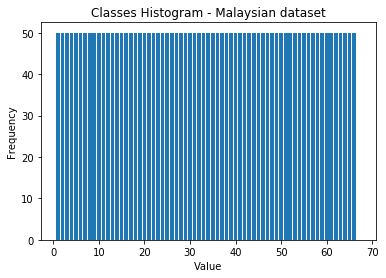

freq->
[50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50]
Mean: 50.00
Var: 0.00
Max: 50.00
Min: 50.00
Sum: 3300.00
STD: 0.00
CV: 0.00

Total number of objects: 3300


In [134]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results/gt_final.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print 'freq->\n',counts
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print 'Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean())
print 'Total number of objects:',len(tmp)

# End of Elimination

In [111]:
#x = cv2.imread('/home/mjiit/Hossam/mtsd_augmentation/data/testing/short/1_aug.jpg')

#os.remove('/home/mjiit/Hossam/mtsd_augmentation/data/testing/short/1_aug.jpg')

#cv2.imwrite('/home/mjiit/Hossam/mtsd_augmentation/data/testing/short/1_aug.jpg', x)

dicte = {'1':[(5,6), (7,8)], '7':[(9,9)], '9':[(0,0)]}
print dicte

del_dicte = []

for did in dicte:
    if did == '7':
        del_dicte.append(did)

for kk in del_dicte:
    del dicte[kk]
print dicte

test = [(1,2), (3,4), (5,7)]

print '__', dicte
dicte['9'] = test
test = [(1,3),(9,0)]
print '---', dicte

{'1': [(5, 6), (7, 8)], '9': [(0, 0)], '7': [(9, 9)]}
{'1': [(5, 6), (7, 8)], '9': [(0, 0)]}
__ {'1': [(5, 6), (7, 8)], '9': [(0, 0)]}
--- {'1': [(5, 6), (7, 8)], '9': [(1, 2), (3, 4), (5, 7)]}


In [58]:
my_dict.items()[2]

('aug2_original_P1840287_aug.jpg_3e368841-d808-4b58-afc5-37ff6baac7d9.jpg',
 [(2756, 1112, 2965, 1309, 64)])

In [59]:
print my_dict.items()[3]

('aug2_original_P1840387_aug.jpg_e0744d93-8e90-4234-8e61-4f5d6c9b1cbf.jpg', [(1055, 1248, 1412, 1569, 22)])


# For Testing

In [385]:
print classes[16]

height-limit-sign-6.-m


In [148]:
# mask with different colors space per each object sequential

#./data/test/gt/P1840014.JPG
#./data/test/gt/P1840114.JPG
# P1860079.JPG

#ff = '130.jpg'
ff = 'P1840185.JPG'
im = cv2.imread(os.path.join(mask_path,ff))
f = open(os.path.join(label_path, ff.split('.')[0]+'.txt'), 'r')
#im[im == 255] = 1
#im[im == 0] = 255
#im[im == 1] = 0
lines = f.readlines()
print 'Number of objects', len(lines)
for i in range(0, len(lines)):
    lower = np.array(color_list[i])-10
    upper = np.array(color_list[i])+10
    mask = cv2.inRange(im, lower, upper)
    im3 = cv2.bitwise_and(im, im, mask=mask)


    print 'obj#', i
    im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

    print np.max(im2), np.min(im2)

    cv2.imwrite('test'+str(i)+'.jpg', im2)
    ret, thresh = cv2.threshold(im2, 0, np.max(im2)+1 ,cv2.THRESH_BINARY)
    _, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print len(contours)
    #for i in range(0, len(contours)):
        #if(i%2 == 0)
    
    # getting the maximum width contours
    x,y,w,h = cv2.boundingRect(contours[0])
    for cnt in contours:
        cx, cy, cw, ch = cv2.boundingRect(cnt)
        if cw > w:
            x,y,w,h = cx, cy, cw, ch
    #cnt = contours[i]
    
    cv2.rectangle(im, (x,y), (x+w, y+h), (0,240,180), 5)
    print (x,y), (x+w, y+h)
    cv2.imwrite(str(i)+'.jpg', im)
    
    print '_______'

Number of objects 7
obj# 0
32 0
1
(240, 1832) (786, 2371)
_______
obj# 1
179 0
4
(255, 1207) (791, 1744)
_______
obj# 2
106 0
9
(640, 89) (814, 260)
_______
obj# 3
255 0
5
(1776, 1737) (1851, 1812)
_______
obj# 4
79 0
16
(2840, 1731) (2877, 1768)
_______
obj# 5
150 0
6
(1831, 1743) (1896, 1829)
_______
obj# 6
17 0
13
(1811, 1609) (1896, 1689)
_______


In [40]:
im = cv2.imread('./data/test/images/P1840121.JPG')
f = open('./data/labels/P1840121.txt')
lines = f.readlines()

im_out = np.zeros(im.shape, np.uint8)

for line in lines:
    spl = line.split(' ')
    x1 = int(spl[1])+1
    y1 = int(spl[2])+1
    x2 = int(spl[3])-1
    y2 = int(spl[4])-1
    
    cv2.rectangle(im_out, (x1,y1), (x2,y2),(255,255,255), -1)
    
cv2.imwrite('test.jpg', im_out)   

True

In [123]:
im = cv2.imread('./data/test/gt/P1840217.JPG')
im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(im2, 8, 8 ,8)
_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i in range(0, len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    cv2.rectangle(im, (x,y), (x+w, y+h), (0,255,0), 2)
    print (x,y), (x+w, y+h)
    cv2.imwrite(str(i)+'.jpg', im)

(2644, 1198) (2805, 1366)
(2800, 1360) (2804, 1365)
(2654, 1360) (2801, 1365)
(2650, 1360) (2654, 1364)
(2645, 1360) (2649, 1365)
(2650, 1199) (2653, 1361)
(2646, 1199) (2649, 1361)
